In [2]:
import numpy as np 
import pandas as pd 
import os
import matplotlib as npl
import matplotlib.pyplot as plt
os.chdir("C:\\Users\\Start\\Desktop\\Hate Speach")


In [3]:
#Reading the data set : the firt one is for training and the second one for the last test
train = pd.read_csv("train_E6oV3lV.csv")
test = pd.read_csv("test_tweets_anuFYb8.csv")

In [4]:
# return the first 5 rows from the training data 
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
# return the first 5 rows from the test data 
test.head()


,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [5]:
train['label'] = train['label'].astype('category') #  convert the label column to categorical type (catgory)
train.info() #prints information about a DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   id      31962 non-null  int64   
 1   label   31962 non-null  category
 2   tweet   31962 non-null  object  
dtypes: category(1), int64(1), object(1)
memory usage: 530.8+ KB


,label
0,29720
1,2242


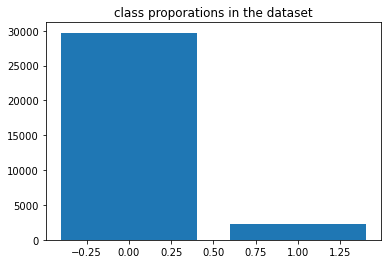

In [6]:
#check class distribution in dependant variable
display(train['label'].value_counts().to_frame())
plt.bar([0,1],train['label'].value_counts())
plt.title("class proporations in the dataset")
plt.show
from nltk.stem import WordNetLemmatizer
from nltk import tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import re
#nltk.download()
from nltk.corpus import wordnet

In [7]:
#Remove the special characters, numbers etc. (keep only alphabets)
#lemmatize the text
train['text_lem'] = [''.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]',' ',text)) for text in lis]) for lis in train['tweet']]
test['text_lem'] = [''.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]',' ',text)) for text in lis]) for lis in test['tweet']]

In [8]:
from sklearn.model_selection import train_test_split
#Split arrays or matrices into random train and test subsets
X_train,X_test,y_train,y_test = train_test_split(train['text_lem'],train['label'])
X_train
X_test


26433    he put a ring on it                proposal  s...
12935    got a  user  retweet i ve truly made it in lif...
29941    you people should be really enjoying the conce...
140        user demoing guitars for new album  newalbum...
6587       user the couple i knew that ll be together f...
                               ...                        
15370     user so if i want  performance  i have to buy...
25630    sand a is an amazing way to keep your children...
21324    and yet  you re still going to vote for him   ...
20748    be crazy   be different      people    me  ent...
18425      user order today      handmade  etsy  mensfa...
Name: text_lem, Length: 7991, dtype: object

In [9]:
#Convert a collection of raw documents to a matrix of TF-IDF features.
vect = TfidfVectorizer(ngram_range = (1,4)).fit(X_train)


In [10]:
vect_transformed_X_train = vect.transform(X_train)
vect_transformed_X_test = vect.transform(X_test)
vect_transformed_X_train

<23971x557647 sparse matrix of type '<class 'numpy.float64'>'
	with 1001835 stored elements in Compressed Sparse Row format>

In [11]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score
#F1 score is used as an evaluation measure as, when the data is skewed like in this case, 
#where the number of hate speech tweets are very less, accuracy cannot be relied upon.

In [44]:
# Using SVC model
modelSVC = SVC(C=100).fit(vect_transformed_X_train,y_train)

In [45]:
#doing the predection (test)
predictionsSVC = modelSVC.predict(vect_transformed_X_test)
#print nb where the predectionSVC was 1 / th length of y test / and the f1 score ( to compare between the models)
sum(predictionsSVC==1),len(y_test),f1_score(y_test,predictionsSVC)

(279, 7991, 0.6275449101796408)

In [46]:
#Using LogisticRegression model
modelLR = LogisticRegression(C=100,max_iter=40000).fit(vect_transformed_X_train,y_train)

In [47]:
predictionsLR = modelLR.predict(vect_transformed_X_test)
sum(predictionsLR==1),len(y_test),f1_score(y_test,predictionsLR)

(427, 7991, 0.7100712105798576)

In [18]:
#Using Naive Bayes classifier for multinomial models model
modelNB = MultinomialNB(alpha=1.7).fit(vect_transformed_X_train,y_train)

In [19]:
predictionsNB = modelNB.predict(vect_transformed_X_test)
sum(predictionsNB==1),len(y_test),f1_score(y_test,predictionsNB)

(50, 7991, 0.15037593984962405)

In [20]:
#Using Random Forest model
modelRF = RandomForestClassifier(n_estimators=20).fit(vect_transformed_X_train,y_train)

In [21]:
predictionsRF = modelRF.predict(vect_transformed_X_test)
sum(predictionsRF==1),len(y_test),f1_score(y_test,predictionsRF)

(209, 7991, 0.5)

In [22]:
#Using SGD  model
modelSGD = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3).fit(vect_transformed_X_train,y_train)

In [23]:
predictionsSGD = modelSGD.predict(vect_transformed_X_test)
sum(predictionsSGD==1),len(y_test),f1_score(y_test,predictionsSGD)

(25, 7991, 0.078125)

In [12]:
#Based on all the above models trained we conclude that the logistic regression(C=100) is the better model amoung them, 
# we use this model as our final model.
# we do the same steps
vect = TfidfVectorizer(ngram_range = (1,4)).fit(train['text_lem'])
vect_transformed_train = vect.transform(train['text_lem'])
vect_transformed_test = vect.transform(test['text_lem'])

In [13]:
FinalModel = LogisticRegression(C=100,max_iter=40000).fit(vect_transformed_train,train['label'])


In [36]:

predictions = FinalModel.predict(vect_transformed_test)

#import seaborn as sns
#f, (ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
#ax1.scatter(predictions,test.index,alpha=0.2)
#ax2=sns.distplot(predictions)


In [15]:
submission = pd.DataFrame({'id':test['id'],'label':predictions})

In [17]:
#make the results in a csv file named test_predection
file_name = 'test_predictionss.csv'
submission.to_csv(file_name,index=False)

,label
0,16208
1,989


<function matplotlib.pyplot.show(*args, **kw)>

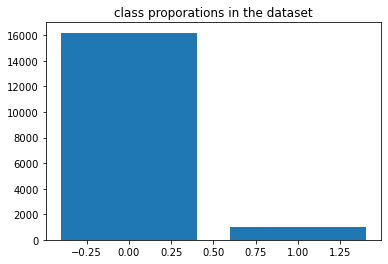

In [19]:
result = pd.read_csv("test_predictionss.csv")
result
display(result['label'].value_counts().to_frame())
plt.bar([0,1],result['label'].value_counts())
plt.title("class proporations in the dataset")
plt.show